# 11.11.1 Changing the transition rates

The numerical computation of the Kolmogorov formula is considered with changes of the transition rates at predefined dates. 

In the following we consider the same *system* as in the notebook `11_09_TimeDependentSolution` where states are defined as:
- State 2: Normal operating state
- State 1: Degraded operating state
- State 0: Failure state

and where $\lambda_{i,j}$ is the transition rate from state $i$ to state $j$.
Therefore, $\lambda_{2,1}$ and $\lambda_{1,0}$ should be considered as degradation rates while $\lambda_{0,2}$ is a renewing rate.

![](./../../images/Schema_11_09.png)

We assume that transition rates may depend on the seasons, for example, and change depending on time. For instance, degradations are *fastest* during the *winter time* and repairing interventions require more time. On the other hand, during the *summer time* degradations are slower and maintenance is achieved more quickly. 

For simplicity's sake, we consider that simulation starts at the beginning of the summer time and that the initial state is the state 2.

### Import

In [1]:
import numpy as np
from scipy.linalg import expm

%matplotlib notebook
import matplotlib.pyplot as plt

### Parameters

In [2]:
# Transition rates during summer time (1/h)
lambda_21_s = 5e-4
lambda_10_s = 5e-4
lambda_02_s = 1e-2
# Transition rates during winter time (1/h)
lambda_21_w = 1e-3
lambda_10_w = 1e-3
lambda_02_w = 5e-3
# Annual ratio summer/winter time
rat_s = 0.5
rat_w = 1-rat_s
# Time (h)
t_start = 0
t_end = 24*365*5
t_nstep = 10000
# Initial state
state0 = 2

### Equation variables

In [3]:
# matrix A (summer and winter time)
A_s = np.array([
    [-lambda_02_s, 0, lambda_02_s],
    [lambda_10_s, -lambda_10_s, 0],
    [0, lambda_21_s, -lambda_21_s]])
A_w = np.array([
    [-lambda_02_w, 0, lambda_02_w],
    [lambda_10_w, -lambda_10_w, 0],
    [0, lambda_21_w, -lambda_21_w]])
# initial system state
P0 = np.zeros((3, ))
P0[state0] = 1
# time vector
t = np.linspace(t_start, t_end, t_nstep)

### Numerical computation

In [5]:
P = np.zeros((3, t_nstep))
for it in range(t_nstep):
    M = np.eye(A_s.shape[0])
    nYear = int(t[it]//(365*24))
    rat = (t[it]%(365*24))/(365*24)
    for iy in range(0, nYear):
        M = M@expm(A_s*rat_s*365*24)@expm(A_w*rat_w*365*24)
    if rat<rat_s:
        P[:, it] = P0@M@expm(A_s*rat*(365*24))
    else:
        P[:, it] = P0@M@expm(A_s*rat_s*(365*24))@expm(A_w*(rat-rat_s)*(365*24))

### Illustration

<IPython.core.display.Javascript object>


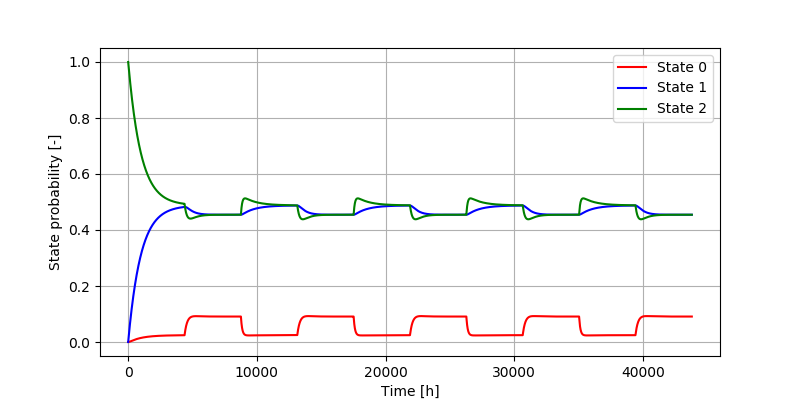

In [6]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)
vColor = ['r', 'b', 'g']
for jd in range(3):
    ax.plot(t, P[jd, :], color=vColor[jd], label='State {:d}'.format(jd))
ax.set_xlabel('Time [h]')
ax.set_ylabel('State probability [-]')
ax.legend()
ax.grid(True)